In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

In [2]:
warnings.filterwarnings('ignore')

## Loading Cleaned Train and Test Datasets

In [3]:
train_data = pd.read_csv("clean_train.csv",index_col=0)
test_data = pd.read_csv("clean_test.csv",index_col=0)

In [4]:
train_data.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count,Chr_Cond_Count,PotentialFraud
0,BENE11001,0,0,0,39,230,12,12,0,1,...,6,2009,4,96.05,27068.0,2,1,1,4,Yes
1,BENE12511,0,0,0,39,510,12,12,1,1,...,0,2009,12,100.00,600.0,2,2,2,8,Yes
2,BENE14577,1,0,1,33,70,12,12,1,0,...,0,2009,9,100.00,20.0,3,2,2,8,Yes
3,BENE15074,1,0,0,39,470,12,12,0,1,...,0,2009,3,100.00,30.0,1,1,1,7,Yes
4,BENE16973,0,0,0,39,310,12,12,0,0,...,0,2009,9,100.00,50.0,6,3,2,7,Yes


In [5]:
test_data.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count,Chr_Cond_Count
0,BENE11001,0,0,0,39,230,12,12,0,1,...,-1,0,2009,6,100.0,30.0,1,1,1,4
1,BENE11001,0,0,0,39,230,12,12,0,1,...,-1,0,2009,6,100.0,30.0,2,1,1,4
2,BENE11007,0,1,0,45,610,12,12,0,0,...,-1,0,2009,3,100.0,200.0,2,1,1,6
3,BENE11007,0,1,0,45,610,12,12,0,0,...,-1,0,2009,7,100.0,10.0,9,5,3,6
4,BENE11007,0,1,0,45,610,12,12,0,0,...,-1,0,2009,8,100.0,10.0,2,1,1,6


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558211 entries, 0 to 558210
Data columns (total 62 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   Gender                           558211 non-null  int64  
 2   Race                             558211 non-null  int64  
 3   RenalDiseaseIndicator            558211 non-null  int64  
 4   State                            558211 non-null  int64  
 5   County                           558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Chronic

In [7]:
train_data.isnull().sum()

BeneID                   0
Gender                   0
Race                     0
RenalDiseaseIndicator    0
State                    0
                        ..
Physician_Count          0
Claim_Count              0
Hospital_Count           0
Chr_Cond_Count           0
PotentialFraud           0
Length: 62, dtype: int64

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135392 entries, 0 to 135391
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           135392 non-null  object 
 1   Gender                           135392 non-null  int64  
 2   Race                             135392 non-null  int64  
 3   RenalDiseaseIndicator            135392 non-null  int64  
 4   State                            135392 non-null  int64  
 5   County                           135392 non-null  int64  
 6   NoOfMonths_PartACov              135392 non-null  int64  
 7   NoOfMonths_PartBCov              135392 non-null  int64  
 8   ChronicCond_Alzheimer            135392 non-null  int64  
 9   ChronicCond_Heartfailure         135392 non-null  int64  
 10  ChronicCond_KidneyDisease        135392 non-null  int64  
 11  ChronicCond_Cancer               135392 non-null  int64  
 12  Chronic

In [9]:
test_data.isnull().sum()

BeneID                     0
Gender                     0
Race                       0
RenalDiseaseIndicator      0
State                      0
                        ... 
Total_Claim_Amt          196
Physician_Count            0
Claim_Count                0
Hospital_Count             0
Chr_Cond_Count             0
Length: 61, dtype: int64

In [10]:
# Define the threshold for non-null values
threshold = len(train_data) * 0.5  # For example, let's keep columns with at least 50% non-null values

# Drop columns with majority null values from train_data
train_data = train_data.dropna(axis=1, thresh=threshold)

# Create a copy of train_data without the 'PotentialFraud' column
train_data_copy = train_data.drop(columns=['PotentialFraud'])

# Subset the columns of test_data based on the columns of the new train_data_copy DataFrame
test_data = test_data[train_data_copy.columns]

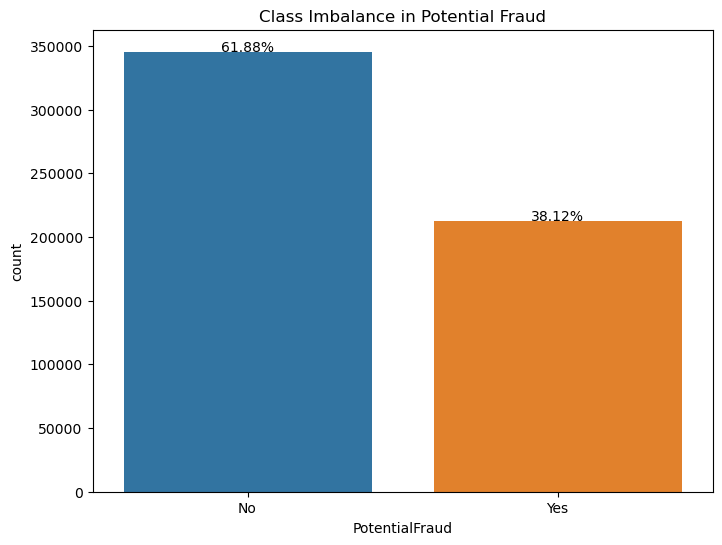

In [11]:
# Plot the count of each category in the 'PotentialFraud' column
# Calculate class percentages
class_counts = train_data['PotentialFraud'].value_counts()
total_samples = class_counts.sum()
class_percentages = [(count / total_samples) * 100 for count in class_counts]

# Sort the class counts and percentages in descending order
class_counts_sorted = class_counts.sort_values(ascending=False)
class_percentages_sorted = [(count / total_samples) * 100 for count in class_counts_sorted]

# Plot countplot with percentage labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='PotentialFraud', data=train_data, order=class_counts_sorted.index)
plt.title('Class Imbalance in Potential Fraud')

# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.2,
            f'{class_percentages_sorted[i]:.2f}%',
            ha="center")

plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [13]:
# Dropping some additional features to evaluate performance

train_data = train_data.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov','ChronicCond_Alzheimer',\
                            'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',\
                            'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',\
                            'ChronicCond_Depression', 'ChronicCond_Diabetes',\
                            'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',\
                            'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke'], axis=1)

test_data = test_data.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov','ChronicCond_Alzheimer',\
                          'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',\
                          'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',\
                          'ChronicCond_Depression', 'ChronicCond_Diabetes',\
                          'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',\
                          'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke'], axis=1)

In [14]:
# Drop object columns from train and test data
train_data = train_data.drop(['BeneID','ClaimID','Provider'], axis=1)
test_data = test_data.drop(['BeneID','ClaimID','Provider'], axis=1)

In [15]:
# Step 1: Split the data into features (X) and target (y) variables
X = train_data.drop(columns=['PotentialFraud'])
y = train_data['PotentialFraud']

In [16]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

In [17]:
# Step 2: Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:
# Initialize the imputer with median strategy
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on train_data
X_train = imputer.fit_transform(X_train)

X_valid = imputer.transform(X_valid)

In [19]:
# Step 3: Perform standard scaling on the features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [20]:
## Step 4: Use SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [28]:
# Save the arrays to .npz files
np.savez('data.npz', X_train_balanced=X_train_balanced, y_train_balanced=y_train_balanced, X_valid_scaled=X_valid_scaled, y_valid=y_valid)

In [ ]:
svm_model = naive_model(SVC(kernel='linear'), X_train_balanced, y_train_balanced)
evaluate_model(svm_model, X_valid_scaled, y_valid)

In [ ]:
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_grid = tuned_model(SVC(), svm_param_grid, X_train_balanced, y_train_balanced)
evaluate_model(svm_grid, X_valid_scaled, y_valid)

In [ ]:
dt_model = naive_model(DecisionTreeClassifier(), X_train_balanced, y_train_balanced)
evaluate_model(dt_model, X_valid_scaled, y_valid)

In [ ]:
dt_param_grid = {'max_depth': [None, 10, 20, 30]}
dt_grid = tuned_model(DecisionTreeClassifier(), dt_param_grid, X_train_balanced, y_train_balanced)
evaluate_model(dt_grid, X_valid_scaled, y_valid)

In [ ]:
rf_model = naive_model(RandomForestClassifier(), X_train_balanced, y_train_balanced)
evaluate_model(rf_model, X_valid_scaled, y_valid)

In [ ]:
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_grid = tuned_model(RandomForestClassifier(), rf_param_grid, X_train_scaled, y_train_balanced)
evaluate_model(rf_grid, X_valid_scaled, y_valid)